<a href="https://colab.research.google.com/github/Arju-Jawla/Work-on-Significant-Wave-Height-data-for-2022-and-23/blob/main/SWH(22_23)_02_hourly_to_daily_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Required Libraries

In [ ]:
import xarray as xr
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

## 2. Loading data

In [ ]:
# Open the dataset
ds = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_3hrly_22_23.nc')

In [ ]:
# Check the data structure to ensure it is loaded properly
print(ds)

<xarray.Dataset> Size: 6GB
Dimensions:     (valid_time: 5840, latitude: 361, longitude: 720)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 47kB 2022-01-01 ... 2023-12-31T21...
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    expver      (valid_time) <U4 93kB ...
Data variables:
    swh         (valid_time, latitude, longitude) float32 6GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


### 3. Converting Hourly data to daily mean data
* Use resampling method

In [ ]:
# Resample to daily data
ds_daily = ds.resample(valid_time='1D').mean()

In [ ]:
# Check the result
print(ds_daily)

<xarray.Dataset> Size: 759MB
Dimensions:     (valid_time: 730, latitude: 361, longitude: 720)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * valid_time  (valid_time) datetime64[ns] 6kB 2022-01-01 ... 2023-12-31
Data variables:
    swh         (valid_time, latitude, longitude) float32 759MB nan nan ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


In [ ]:
# Print new dimensions and the first few records
print(ds_daily['swh'].shape)  # Check the shape to confirm resampling

(730, 361, 720)


## 4. Save the file

In [ ]:
# Save the resampled dataset to a new NetCDF file
ds_daily.to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_daily_mean_22_23.nc')

## 5. Plot the Data for Checking

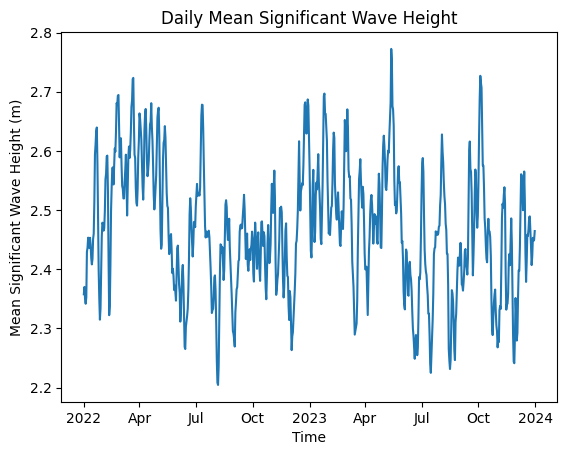

In [ ]:
ds_daily['swh'].mean(dim=['latitude', 'longitude']).plot()
plt.title('Daily Mean Significant Wave Height')
plt.xlabel('Time')
plt.ylabel('Mean Significant Wave Height (m)')
plt.show()

### 5.1 Platting for specific date

In [ ]:
# Select a specific day
specific_date = '2023-05-21'

# Extract data for the specific date
swh_at_specific_day = ds_daily['swh'].sel(valid_time=specific_date)

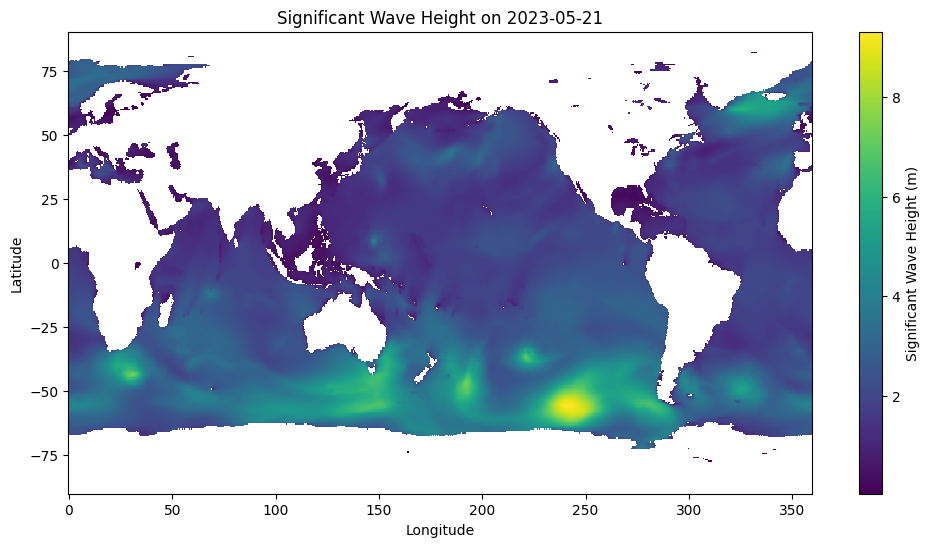

In [ ]:
# Plot spatial data for the specific day
plt.figure(figsize=(12, 6))
# Plot with colorbar disabled
im = swh_at_specific_day.plot(cmap='viridis', add_colorbar=False)
plt.title(f'Significant Wave Height on {specific_date}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Add a custom colorbar
plt.colorbar(im, label='Significant Wave Height (m)')
plt.show()

In [ ]:
# Count non-null values
non_null_count = swh_at_specific_day.notnull().sum().item()

print(f"Number of non-null values in 'swh' for {specific_date}: {non_null_count}")

Number of non-null values in 'swh' for 2023-05-21: 140415
